In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
import streamlit as st
import datetime as dt
import yfinance as yf

In [59]:
STOCK = st.sidebar.text_input("Enter Stock Ticker", 'SBIN.NS')
start_date = st.sidebar.date_input("Enter Start Date", dt.date(2000,1,1))
end_date = st.sidebar.date_input("Enter End Date", dt.datetime.now().date())
df = yf.download(STOCK,start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,22.267092,22.988886,22.101974,22.988886,16.110512,25152894
2000-01-04,22.988886,24.720245,22.535995,24.446625,17.132088,47648560
2000-01-05,23.493668,24.974997,23.116261,23.441774,16.427889,36396207
2000-01-06,23.776726,25.286358,23.776726,24.625893,17.257717,70573968
2000-01-07,24.673071,26.409147,24.059780,25.786425,18.071012,83453217


In [60]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,644.750000,649.400024,635.150024,636.750000,636.750000,14998068
2023-12-26,638.849976,641.299988,635.650024,638.049988,638.049988,10153089
2023-12-27,640.750000,649.450012,639.000000,648.549988,648.549988,14417646
2023-12-28,650.250000,653.299988,646.500000,651.400024,651.400024,16982092
2023-12-29,645.500000,649.599976,639.549988,642.049988,642.049988,13221898


In [61]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5991.000000,5991.000000,5991.000000,5991.000000,5991.000000,5.991000e+03
mean,205.961412,208.684320,202.897368,205.684955,189.967465,2.333482e+07
std,149.196955,150.584165,147.543348,149.035892,148.194808,1.857304e+07
min,13.478195,13.959390,13.214009,13.346102,9.799649,0.000000e+00
25%,75.576019,76.684658,74.167812,75.660938,61.071718,1.221786e+07
50%,202.005005,205.000000,198.199997,201.899994,181.211792,1.850035e+07
75%,276.152512,279.550003,272.574997,275.724991,258.949615,2.866711e+07
max,658.700012,660.400024,646.500000,655.400024,655.400024,2.626771e+08


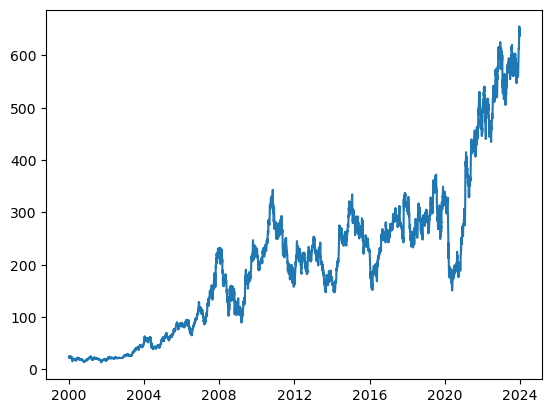

In [62]:
plt.plot(df.Close)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5991 entries, 2000-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5991 non-null   float64
 1   High       5991 non-null   float64
 2   Low        5991 non-null   float64
 3   Close      5991 non-null   float64
 4   Adj Close  5991 non-null   float64
 5   Volume     5991 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 327.6 KB


In [64]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,22.267092,22.988886,22.101974,22.988886,16.110512,25152894
2000-01-04,22.988886,24.720245,22.535995,24.446625,17.132088,47648560
2000-01-05,23.493668,24.974997,23.116261,23.441774,16.427889,36396207
2000-01-06,23.776726,25.286358,23.776726,24.625893,17.257717,70573968
2000-01-07,24.673071,26.409147,24.059780,25.786425,18.071012,83453217
...,...,...,...,...,...,...
2023-12-22,644.750000,649.400024,635.150024,636.750000,636.750000,14998068
2023-12-26,638.849976,641.299988,635.650024,638.049988,638.049988,10153089
2023-12-27,640.750000,649.450012,639.000000,648.549988,648.549988,14417646


In [65]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
                 ...    
2023-12-22    585.495502
2023-12-26    585.715502
2023-12-27    585.999002
2023-12-28    586.394503
2023-12-29    586.830502
Name: Close, Length: 5991, dtype: float64

In [66]:
ma200=df.Close.rolling(200).mean()
ma200

Date
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
                ...    
2023-12-22    575.53000
2023-12-26    576.03675
2023-12-27    576.61075
2023-12-28    577.06175
2023-12-29    577.46350
Name: Close, Length: 5991, dtype: float64

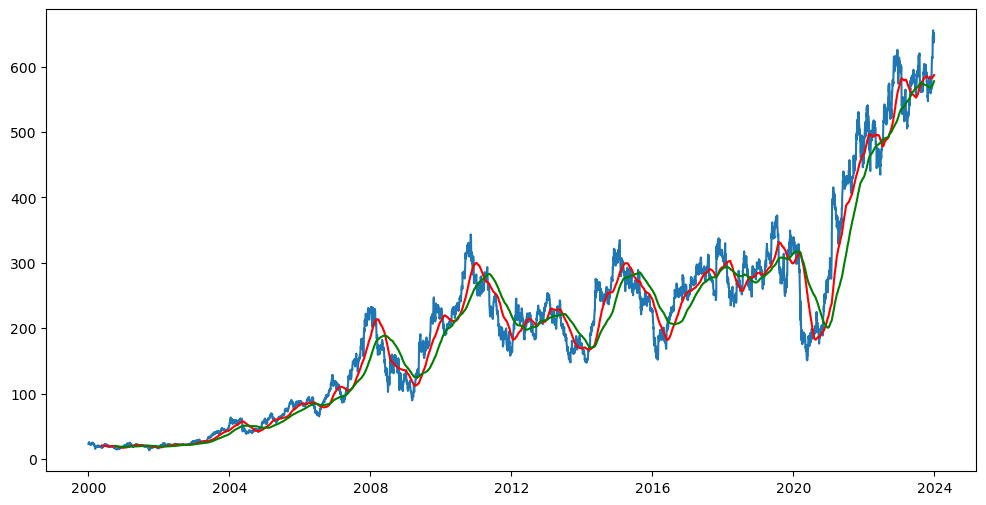

In [67]:
fig=plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [68]:
df.shape

(5991, 6)

In [69]:
data_training = pd.DataFrame(df['Close'][0:int(len(df*0.70))])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(5991, 1)
(1798, 1)


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [71]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01501865],
       [0.01728908],
       [0.01572403],
       ...,
       [0.98933106],
       [0.99376999],
       [0.9792073 ]])

In [72]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
x_train.shape

(5891, 100, 1)

In [74]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [75]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [77]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
185/185 [==============================] - 23s 105ms/step - loss: 0.0122
Epoch 2/50
185/185 [==============================] - 35s 187ms/step - loss: 0.0043
Epoch 3/50
185/185 [==============================] - 38s 204ms/step - loss: 0.0036
Epoch 4/50
185/185 [==============================] - 39s 210ms/step - loss: 0.0036
Epoch 5/50
185/185 [==============================] - 38s 203ms/step - loss: 0.0036
Epoch 6/50
185/185 [==============================] - 38s 203ms/step - loss: 0.0034
Epoch 7/50
185/185 [==============================] - 38s 204ms/step - loss: 0.0031
Epoch 8/50
185/185 [==============================] - 38s 203ms/step - loss: 0.0028
Epoch 9/50
185/185 [==============================] - 38s 203ms/step - loss: 0.0024
Epoch 10/50
185/185 [==============================] - 38s 204ms/step - loss: 0.0023
Epoch 11/50
185/185 [==============================] - 38s 204ms/step - loss: 0.0025
Epoch 12/50
185/185 [==============================] - 39s 209ms/step - lo

In [78]:
model.save('keras_model')

INFO:tensorflow:Assets written to: keras_model/assets


INFO:tensorflow:Assets written to: keras_model/assets


In [79]:
data_testing.head()

,Close
Date,
2016-09-21,251.149994
2016-09-22,257.899994
2016-09-23,254.550003
2016-09-26,251.649994
2016-09-27,249.000000


In [80]:
data_training.tail(100)

,Close
Date,
2023-08-03,590.500000
2023-08-04,573.299988
2023-08-07,567.900024
2023-08-08,573.099976
2023-08-09,573.750000
...,...
2023-12-22,636.750000
2023-12-26,638.049988
2023-12-27,648.549988


In [81]:
past_100_days = data_training.tail(100)

In [82]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [83]:
final_df.head()

,Close
0,590.500000
1,573.299988
2,567.900024
3,573.099976
4,573.750000


In [84]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.87137048],
       [0.83728068],
       [0.82657815],
       ...,
       [0.98642347],
       [0.99207214],
       [0.97354071]])

In [85]:
input_data.shape

(1898, 1)

In [86]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1798, 100, 1)
(1798,)


In [87]:
y_predicted = model.predict(x_test)

57/57 [==============================] - 11s 114ms/step


In [88]:
y_predicted.shape

(1798, 1)

In [89]:
y_predicted

array([[0.89693165],
       [0.88333744],
       [0.8401661 ],
       ...,
       [0.8913021 ],
       [0.8903173 ],
       [0.8930035 ]], dtype=float32)

In [90]:
y_test

array([0.19879097, 0.21216923, 0.20552967, ..., 0.98642347, 0.99207214,
       0.97354071])

In [91]:
scaler.scale_

array([0.00198196])

In [92]:
scale_factor = 1/0.00107175
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

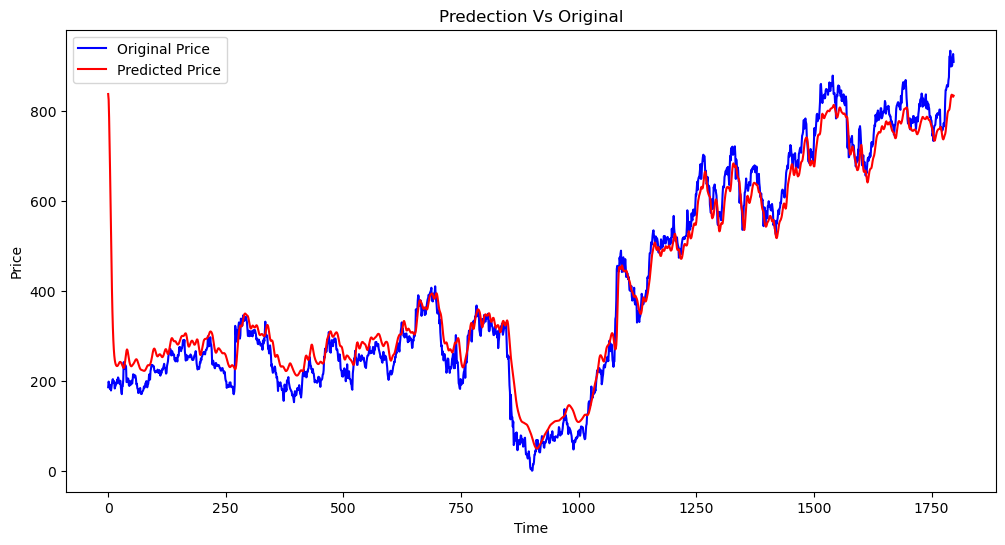

In [93]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b')
plt.plot(y_predicted, 'r')
plt.legend(['Original Price', 'Predicted Price'])
plt.title("Predection Vs Original")
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()
